[0.50398936 0.50737242 0.51075549 0.51413856 0.51752162 0.52090469
 0.52428776 0.52767082 0.53105389 0.53443695 0.53782002 0.54120309
 0.54458615 0.54796922 0.55135229 0.55473535 0.55811842 0.56150149
 0.56488455 0.56826762 0.57165069 0.57503375 0.57841682 0.58179989
 0.58518295 0.58856602 0.59194909 0.59533215 0.59871522 0.60209829
 0.60548135 0.60886442 0.61224748 0.61563055 0.61901362 0.62239668
 0.62577975 0.62916282 0.63254588 0.63592895 0.63931202 0.64269508
 0.64607815 0.64946122 0.65284428 0.65622735 0.65961042 0.66299348
 0.66637655 0.66975962 0.67314268 0.67652575 0.67990881 0.68329188
 0.68667495 0.69005801 0.69344108 0.69682415 0.70020721 0.70359028
 0.70697335 0.71035641 0.71373948 0.71712255 0.72050561 0.72388868
 0.72727175 0.73065481 0.73403788 0.73742095 0.74080401 0.74418708
 0.74757014 0.75095321 0.75433628 0.75771934 0.76110241 0.76448548
 0.76786854 0.77125161 0.77463468 0.77801774 0.78140081 0.78478388
 0.78816694 0.79155001 0.79493308 0.79831614 0.80169921 0.8050

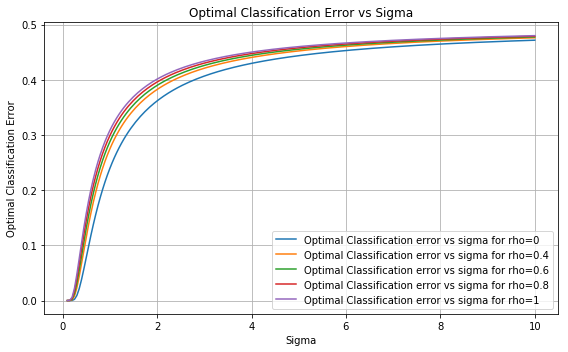

In [34]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[8,5])

x=np.linspace(stats.norm.cdf(0.01),stats.norm.cdf(0.99),100)
print(x)

rhoarray=list([0,0.4,0.6,0.8,1])
sigmarr=np.linspace(.1,10,num=200)
err=np.zeros((len(rhoarray),len(sigmarr)))
#import pdb; pdb.set_trace()
for i in range(0,len(rhoarray)):
    for j in range(0,len(sigmarr)):
        err[i,j]=stats.norm.cdf(-1/(np.sqrt(2)*sigmarr[j]*np.sqrt(1+rhoarray[i])))
    ax.plot(sigmarr,err[i,:],label='Optimal Classification error vs sigma for rho='+str(rhoarray[i]))
    ax.legend()
plt.title('Optimal Classification Error vs Sigma')
plt.ylabel('Optimal Classification Error')
plt.xlabel('Sigma')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw1b.png')


[[1.  0.2]
 [0.2 1. ]]


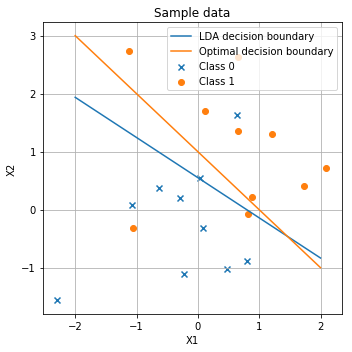

In [4]:
sigma=1
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print(cov)

#create sample two guassian distributions for each mean
x1=np.random.multivariate_normal(u1,cov,10)
x2=np.random.multivariate_normal(u2,cov,10)
xs=np.concatenate((x1,x2),axis=0)

#designed lda classifier
smean1=np.mean(x1,axis=0)
smean2=np.mean(x2,axis=0)
scov1=np.cov(x1.T,rowvar=True)
scov2=np.cov(x2.T,rowvar=True)
scov=(scov1+scov2)/2
scov_inv=np.linalg.inv(scov)
a_lda=scov_inv.dot((smean2-smean1))
b_lda=-0.5*((smean2-smean1).dot(scov_inv)).dot((smean1+smean2))
x1_lda=np.linspace(-2,2,num=20)
y_lda=-a_lda[0]/a_lda[1]*x1_lda-b_lda/a_lda[1]

#optimal classifier
cov_inv=np.linalg.inv(cov)
a_opt=cov_inv.dot((u2-u1))
b_opt=-0.5*((u2-u1).dot(cov_inv)).dot((u1+u2))
x1_opt=np.linspace(-2,2,num=20)
y_opt=-a_opt[0]/a_opt[1]*x1_opt-b_opt/a_opt[1]

#import pdb; pdb.set_trace()
fig, ax = plt.subplots(figsize=[5,5])
plt.scatter(x1[:,0],x1[:,1],marker='x',label='Class 0')
plt.scatter(x2[:,0],x2[:,1],marker='o',label='Class 1')
plt.plot(x1_lda,y_lda,label='LDA decision boundary')
plt.plot(x1_opt,y_opt,label='Optimal decision boundary')
plt.title('Sample data')
plt.ylabel('X2')
plt.xlabel('X1')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw1c.png')

[[1.  0.2]
 [0.2 1. ]]


C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


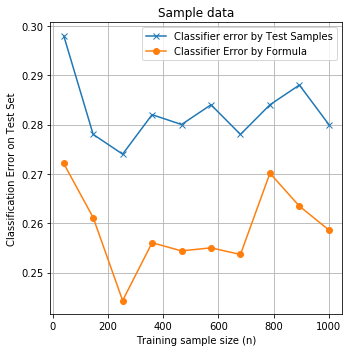

In [44]:
#part d

sigma=1
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print(cov)

nlist=np.linspace(40,1000,num=10)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))
fig, ax = plt.subplots(figsize=[5,5])

# generate test set 
x1_test=np.random.multivariate_normal(u1,cov,250)
x2_test=np.random.multivariate_normal(u2,cov,250)

for t in range(0,len(nlist)) :
    #import pdb; pdb.set_trace()
    #create sample two guassian distributions for each mean
    x1=np.random.multivariate_normal(u1,cov,int(nlist[t]/2))
    x2=np.random.multivariate_normal(u2,cov,int(nlist[t]/2))
    

    #train on training set
    smean1=np.mean(x1,axis=0)
    smean2=np.mean(x2,axis=0)
    scov1=np.cov(x1.T,rowvar=True)
    scov2=np.cov(x2.T,rowvar=True)
    scov=(scov1+scov2)/2
    scov_inv=np.linalg.inv(scov)
    a_lda=scov_inv.dot((smean2-smean1))
    b_lda=-0.5*((smean2-smean1).dot(scov_inv)).dot((smean1+smean2))
    err1=0
    
    #estimate error on test set
    for i in range(0,len(x1_test)):
        g1=a_lda.dot(x1_test[i])+b_lda
        if (g1>0):
            err1+=1
    err2=0
    for i in range(0,len(x2_test)):
        g2=a_lda.dot(x2_test[i])+b_lda
        if (g2<=0):
            err2+=1

    test_error[t]=(err1+err2)/500

    #obtaining error by formula for LDA
    err_lda[t]=0.5*(stats.norm.cdf((a_lda.dot(u1)+b_lda)/np.sqrt(a_lda.dot(scov.dot(a_lda))))+ stats.norm.cdf(-(a_lda.dot(u2)+b_lda)/np.sqrt(a_lda.dot(scov.dot(a_lda)))))

   # print('Test error : ',test_error)

    #import pdb; pdb.set_trace()
    
plt.plot(nlist,test_error,marker='x',label='Classifier error by Test Samples')
plt.plot(nlist,err_lda,marker='o',label='Classifier Error by Formula')
plt.hold(True)
plt.title('Sample data')
plt.ylabel('Classification Error on Test Set')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw1d_large.png')